<h1>Importing Libraries</h1>


In [3]:
!pip install prettytable
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
from sklearn.svm import SVC
from IPython.display import HTML
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=9ba14d3179c96cb72c94984506f56603c5f08ed1e9d1f47e461a61962b7ad21e
  Stored in directory: /home/learner/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


<h1>Downloading the dataset from Sklearn</h1>


In [5]:
# Loading the dataset
from sklearn.datasets import load_iris
df = load_iris()

<h1>Exploratory Data Analysis</h1>


In [6]:
# Converting the numpy dataset to pandas dataframe to allow using some pandas in-built visualisation functions
data = np.c_[df.data, df.target]                   
columns = np.append(df.feature_names, ["target"])  
irisdata = pd.DataFrame(data, columns=columns)     

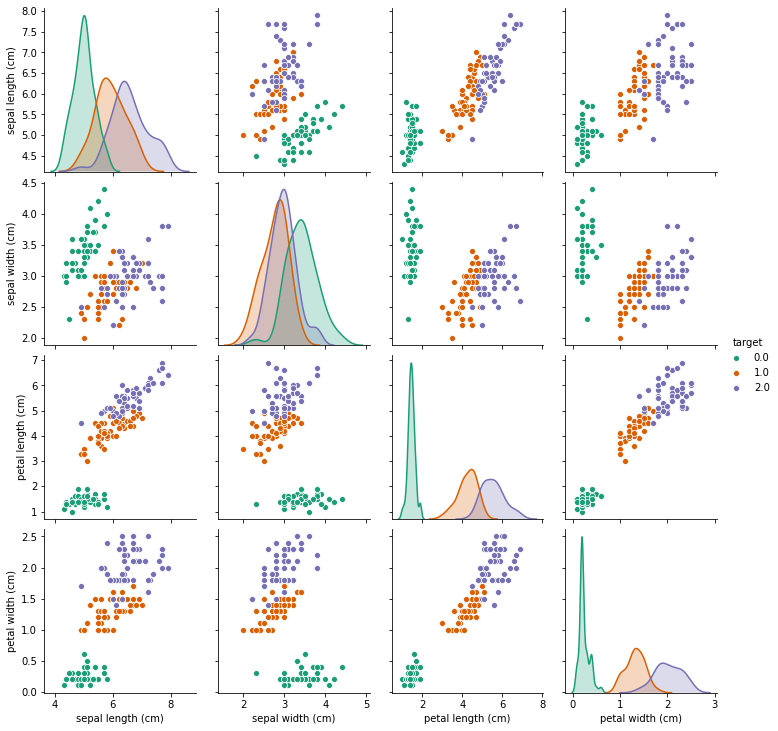

In [0]:
# Plot of various combinations of all the 4 features
sns.pairplot(irisdata,hue='target',palette='Dark2')

In [0]:
# The numpy dataset
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
# Describing the dataset
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [0]:
irisdata.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [0]:
# The feature names of the iris dataset
print(df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
# Pre-classified target names where 0,1,2 correspond to setosa,versicolor and virginica respectively
print(df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
# The species of the flower to be classified
print(df.target_names)

['setosa' 'versicolor' 'virginica']


In [13]:
data = df.data
target = df.target

<h1>Training</h1>

<h4>Taking all permutations of the features in the dataset and kernels in SKLearn SVM Classifier and plotting their result </h4>


In [9]:
def mesh_make(a,b, c=.02):
  y_minimum, y_maximum = b.min() - 1, b.max() + 1
  x_mininum, x_maximum = a.min() - 1, a.max() + 1
  x_x, y_y = np.meshgrid(np.arange(x_minimum, x_maximum, c), np.arange(y_minimum, y_maximum, c))
  return x_x, y_y

def cont_plot(ax, classifier, xx, yy, **params):
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out_val = ax.contourf(xx, yy, Z, **params)
  return out_val

<h1></h1>

Feature 1:  sepal width (cm)
Feature 2:  sepal length (cm)
sepal length (cm) sepal width (cm)
Kernel:  poly
Accuracy:  0.82


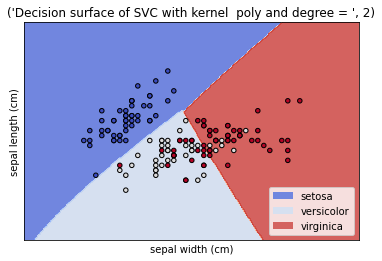

Feature 1:  petal length (cm)
Feature 2:  sepal length (cm)
sepal length (cm) petal length (cm)
Kernel:  poly
Accuracy:  0.9533333333333334


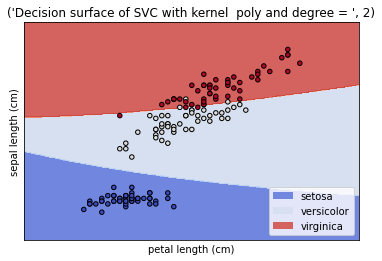

Feature 1:  petal width (cm)
Feature 2:  sepal length (cm)
sepal length (cm) petal width (cm)
Kernel:  poly
Accuracy:  0.96


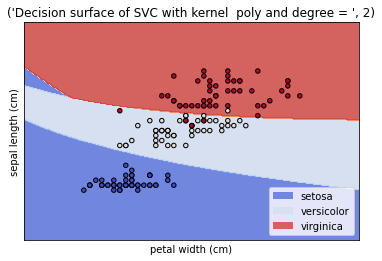

Feature 1:  petal length (cm)
Feature 2:  sepal width (cm)
sepal width (cm) petal length (cm)
Kernel:  poly
Accuracy:  0.96


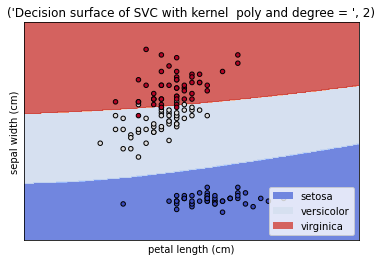

Feature 1:  petal width (cm)
Feature 2:  sepal width (cm)
sepal width (cm) petal width (cm)
Kernel:  poly
Accuracy:  0.9533333333333334


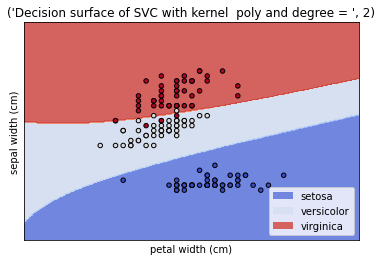

Feature 1:  petal width (cm)
Feature 2:  petal length (cm)
petal length (cm) petal width (cm)
Kernel:  poly
Accuracy:  0.9666666666666667


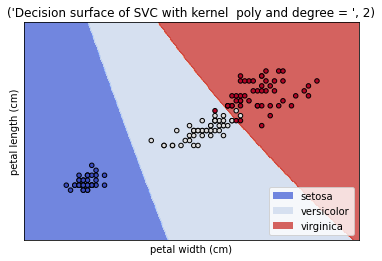

Feature 1:  sepal width (cm)
Feature 2:  sepal length (cm)
sepal length (cm) sepal width (cm)
Kernel:  linear
Accuracy:  0.82


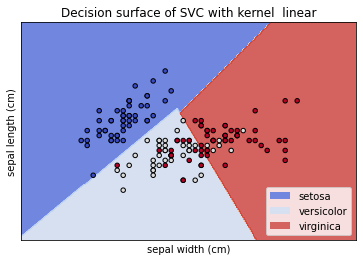

Feature 1:  petal length (cm)
Feature 2:  sepal length (cm)
sepal length (cm) petal length (cm)
Kernel:  linear
Accuracy:  0.9533333333333334


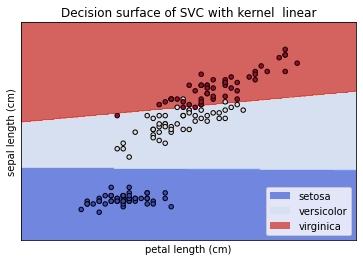

Feature 1:  petal width (cm)
Feature 2:  sepal length (cm)
sepal length (cm) petal width (cm)
Kernel:  linear
Accuracy:  0.96


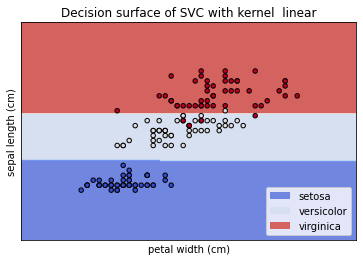

Feature 1:  petal length (cm)
Feature 2:  sepal width (cm)
sepal width (cm) petal length (cm)
Kernel:  linear
Accuracy:  0.96


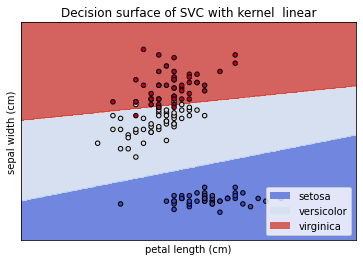

Feature 1:  petal width (cm)
Feature 2:  sepal width (cm)
sepal width (cm) petal width (cm)
Kernel:  linear
Accuracy:  0.96


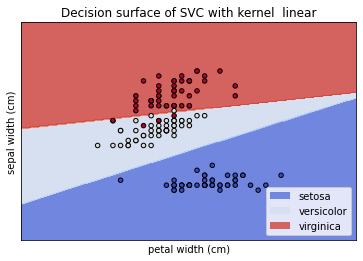

Feature 1:  petal width (cm)
Feature 2:  petal length (cm)
petal length (cm) petal width (cm)
Kernel:  linear
Accuracy:  0.9666666666666667


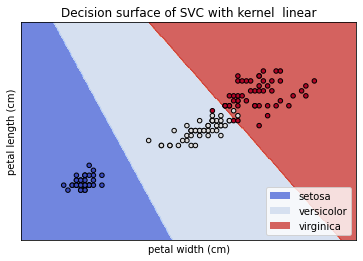

Feature 1:  sepal width (cm)
Feature 2:  sepal length (cm)
sepal length (cm) sepal width (cm)
Kernel:  rbf
Accuracy:  0.82


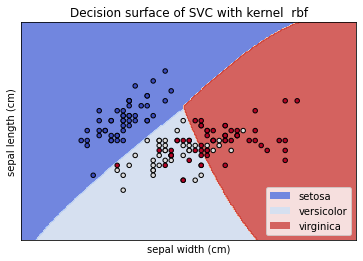

Feature 1:  petal length (cm)
Feature 2:  sepal length (cm)
sepal length (cm) petal length (cm)
Kernel:  rbf
Accuracy:  0.96


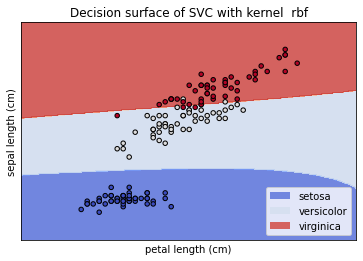

Feature 1:  petal width (cm)
Feature 2:  sepal length (cm)
sepal length (cm) petal width (cm)
Kernel:  rbf
Accuracy:  0.96


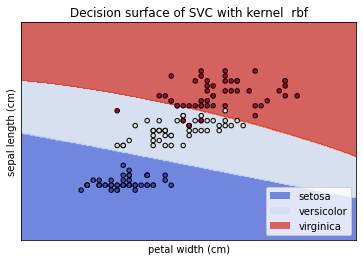

Feature 1:  petal length (cm)
Feature 2:  sepal width (cm)
sepal width (cm) petal length (cm)
Kernel:  rbf
Accuracy:  0.9533333333333334


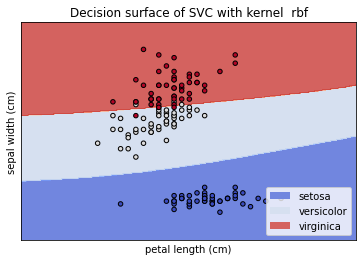

Feature 1:  petal width (cm)
Feature 2:  sepal width (cm)
sepal width (cm) petal width (cm)
Kernel:  rbf
Accuracy:  0.96


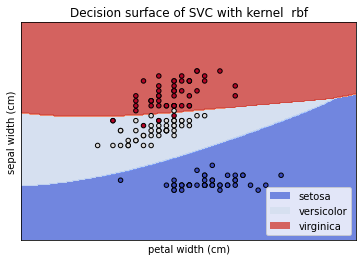

Feature 1:  petal width (cm)
Feature 2:  petal length (cm)
petal length (cm) petal width (cm)
Kernel:  rbf
Accuracy:  0.9533333333333334


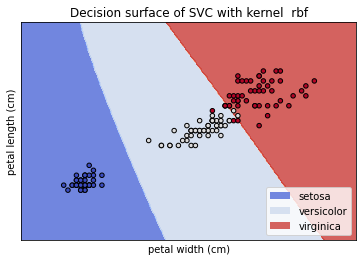

In [0]:
s = data
t = target
result = []
kernel = ['poly','linear','rbf']
for k in kernel:
  for i in range(4):
    for j in range(i,4):
      if i!=j:
        X = s[:,[i,j]]
        y = t

        if(k=='poly'):
          model = svm.SVC(kernel=k, degree=2)
        else:
          model = svm.SVC(kernel=k)

        clf = model.fit(X, y)
        
        fig, ax = plt.subplots()
        # title for the plots
        if(k == 'poly'):
          title = ('Decision surface of SVC with kernel  '+k+" and degree = ",2)
        else:  
          title = ('Decision surface of SVC with kernel  '+k)
        # Set-up grid for plotting.
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = mesh_make(X0, X1)
        
        cont_plot(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        scatter = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        ax.set_ylabel(df.feature_names[i])
        ax.set_xlabel(df.feature_names[j])
        classes = df.target_names
        class_colours = ['#7186df','#d6e0f0','#d4625f']
        recs = []
        for f in range(0,len(class_colours)):
          recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[f]))
        plt.legend(recs,classes,loc=4)
        y_pred = model.predict(X)
        accuracy = metrics.accuracy_score(y,y_pred)
        if i != j:
          result.append([df.feature_names[i],df.feature_names[j],k,accuracy])
        print("Feature 1: ",df.feature_names[j])
        print("Feature 2: ",df.feature_names[i])
        print(df.feature_names[i],df.feature_names[j])
        print("Kernel: ",k)
        print("Accuracy: ",accuracy)
        plt.show()

<h1>Evaluation Metrics</h1>
<h3>Printing accuracy scores for all combinations</h3>



In [0]:

count = 1
data = []
for row in result:
  row = [count]+row
  data.append(row)
  count = count + 1
df = pd.DataFrame(data, columns=['Serial Number','Feature 1', 'Feature 2', 'kernel','Accuracy'])
x = PrettyTable()
x.field_names = df.columns.tolist()
for row in df.values:
  x.add_row(row)
print(x)

+---------------+-------------------+-------------------+--------+--------------------+
| Serial Number |     Feature 1     |     Feature 2     | kernel |      Accuracy      |
+---------------+-------------------+-------------------+--------+--------------------+
|       1       | sepal length (cm) |  sepal width (cm) |  poly  |        0.82        |
|       2       | sepal length (cm) | petal length (cm) |  poly  | 0.9533333333333334 |
|       3       | sepal length (cm) |  petal width (cm) |  poly  |        0.96        |
|       4       |  sepal width (cm) | petal length (cm) |  poly  |        0.96        |
|       5       |  sepal width (cm) |  petal width (cm) |  poly  | 0.9533333333333334 |
|       6       | petal length (cm) |  petal width (cm) |  poly  | 0.9666666666666667 |
|       7       | sepal length (cm) |  sepal width (cm) | linear |        0.82        |
|       8       | sepal length (cm) | petal length (cm) | linear | 0.9533333333333334 |
|       9       | sepal length (

<h1>Inference<h1> <h3>(Answer to Question 1 in the document)</h3>

<ul>
  <li>Looking at the table and the visualizations above, we can conclude that, when we take 2 features at a time <b>petal length</b> and <b>petal width</b> separates the data most accurately.</li>
  <li>Secondly, the corresponding kernels are polynomial kernel(Quadratic) and linear</li>
</ul>

<h1>Comparision of  OneVsAll with OneVsOne </h1>


In [15]:
# Splitting the dataset into test and train
s_train,s_test,t_train,t_test = train_test_split(s,t,test_size=0.33,random_state=4)

In [0]:
#Printing shapes
print(s_train.shape)
print(s_test.shape)
print(t_train.shape)
print(t_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


In [0]:
# One-vs-One SVM Classifier Prediction
smodel = OneVsOneClassifier(SVC()).fit(s_train, t_train)
smodel.fit(s_train, t_train)
sprediction = smodel.predict(s_test)
print(sprediction)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2]


In [0]:
# One-vs-Rest SVM Classifier Prediction
clf = OneVsRestClassifier(SVC()).fit(s_train, t_train)
spredict = clf.predict(s_test)
print(spredict)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2]


In [0]:
# Actual values which should have been predicted based on testing dataset
print(t_test)

[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2]


<h1>Evaluating the classifiers</h1>

In [0]:
# Accuracy for One-vs-One Classifier
accuracy = metrics.accuracy_score(t_test,sprediction)
print(accuracy)

0.98


In [0]:
# Accuracy for One-vs-Rest Classifier
accuracy1 = metrics.accuracy_score(t_test,spredict)
print(accuracy1)

0.98


In [0]:
# Confusion matrix
conftest = confusion_matrix(t_test, sprediction)  # One-vs-One Classifier
conf = confusion_matrix(t_test, spredict)         # One-vs-Rest Classifier
print("One Vs One Classififer")
print(conftest)
print("One Vs Rest Classifier")
print(conf)

One Vs One Classififer
[[23  0  0]
 [ 0 11  1]
 [ 0  0 15]]
One Vs Rest Classifier
[[23  0  0]
 [ 0 11  1]
 [ 0  0 15]]


<h1>Classification Report</h1>


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print("One Vs One Classififer")
print(classification_report(t_test, sprediction))  # One-vs-One Classifier
print("One Vs Rest Classifier")

print(classification_report(t_test, spredict))     # One-vs-Rest Classifier

One Vs One Classififer
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50

One Vs Rest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



<h1>Inference</h1> 
<h2>Answer to Question 2 in the document</h2>


<b>As the dataset is balanced well in our case, so both the classifiers perform equally well</b>. But in case of certain conditions like the following, one of them might be preferable <br>
<ol>
<li> One vs rest trains less no of classifiers and is faster than One vs One as it trains just <b>n</b> combination rather than having <b>n*(n-1)/2</b> combinations.</li>
   <li> One vs one is less prone to imbalanced dataset</li>
</ol>
<b>Easier to compute</b> : One-vs-Rest is easier to compute because it grabs a class and creates a binary label for whether a point belongs to a class or not, contrary to the One-vs-One approach in which each class is modeled against all the other classes independently.

<b>Please Note</b>
<p> We tried with a split of 0.2, we got that OneVsOne gave better results in accuracy, but that is not a fair mesaure to judge as the testing set is very small.</p>

# Training the model with all features and different kernels


<h2>Linear Kernel</h2>


In [0]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(s_train,t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
t_pred = svc.predict(s_test)
print(t_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2]


In [0]:
cm = confusion_matrix(t_test, t_pred)
print(cm)

[[23  0  0]
 [ 0 11  1]
 [ 0  0 15]]


In [0]:
print("Classification Report")
print(classification_report(t_test, t_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



<h2>Polynomial Kernel</h2>

In [0]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly', degree=2)
svc.fit(s_train, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
t_pred = svc.predict(s_test)
print(t_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2]


In [0]:
cm = confusion_matrix(t_test, t_pred)
print(cm)

[[23  0  0]
 [ 0 11  1]
 [ 0  0 15]]


In [0]:
print("Classification Report")
print(classification_report(t_test, t_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



<h2>RBF Kernel</h2>

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(s_train, t_train)

/home/learner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
t_pred = svc.predict(s_test)
print(t_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2]


In [0]:
cm = confusion_matrix(t_test,t_pred)
print(cm)

[[23  0  0]
 [ 0 11  1]
 [ 0  0 15]]


In [0]:
print("Classification Report")
print(classification_report(t_test, t_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



<h1>Finding the best hyperparameters for the model</h1>
<p>Applying GridSearch to find the best hyperparameters for the classifier. <br>The paramerters considered for grid search are as follows.</p>

<ol>
  <li>C(Regularization): This is the missclassification term. It tellls the SVM how much error can be considered.</li>
  <li>Kernel: Basically, it translates a low dimension input space and tranforms it to higher dimensions</li>
  <li>Gamma: It tells how far the influence of a single training sample reaches</li>
</ol>

In [0]:
grid = {'C': [0.1,1, 10,], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}
gridRef = GridSearchCV(SVC(),grid,refit=True,verbose=2)
gridRef.fit(s_train,t_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
#Best hyperparams
print(gridRef.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Confusion Metrics

In [0]:
grid_preds = gridRef.predict(s_test)
print(confusion_matrix(t_test,grid_preds))

[[23  0  0]
 [ 0 11  1]
 [ 0  0 15]]


In [0]:
print(classification_report(t_test,grid_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



<h1> Grid Search Results</h1>
<h4>(Includes answer to Question 3)</h4>
<b>
<ol>
<li>Accuracy: 98% </li>
<li>Value of C : 0.1</li>
<li>Value of Gamma :  1</li>
<li>Best performing kernel : Linear</li>
</ol>
</b>
